<a href="https://colab.research.google.com/github/aletbm/MySolutions_StockMarketsAnalytics2025_DataTalks.Club/blob/main/01_Intro_and_Data_Sources/01_Intro_and_Data_Sources.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplcyberpunk -q

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import time
from datetime import date
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk

plt.style.use("cyberpunk")

#2025-05-01
end = date(year=2025, month=5, day=1)

#2025-01-01
start = date(year=2025, month=1, day=1)
print(f'Period for indexes: {start} to {end} ')

Period for indexes: 2025-01-01 to 2025-05-01 


## Module 1 Homework (2025 cohort)

In this homework, we're going to download finance data from various sources and make simple calculations or analysis.


---
### Question 1: [Index] S&P 500 Stocks Added to the Index

**Which year had the highest number of additions?**

Using the list of S&P 500 companies from Wikipedia's [S&P 500 companies page](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies), download the data including the year each company was added to the index.

Hint: you can use [pandas.read_html](https://pandas.pydata.org/docs/reference/api/pandas.read_html.html) to scrape the data into a DataFrame.

Steps:
1. Create a DataFrame with company tickers, names, and the year they were added.
2. Extract the year from the addition date and calculate the number of stocks added each year.
3. Which year had the highest number of additions (1957 doesn't count, as it was the year when the S&P 500 index was founded)? Write down this year as your answer (the most recent one, if you have several records).

*Context*:
> "Following the announcement, all four new entrants saw their stock prices rise in extended trading on Friday" - recent examples of S&P 500 additions include DASH, WSM, EXE, TKO in 2025 ([Nasdaq article](https://www.nasdaq.com/articles/sp-500-reshuffle-dash-tko-expe-wsm-join-worth-buying)).

*Additional*: How many current S&P 500 stocks have been in the index for more than 20 years? When stocks are added to the S&P 500, they usually experience a price bump as investors and index funds buy shares following the announcement.

In [ ]:
list_SP500 = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

tables = pd.read_html(list_SP500, flavor="lxml")
print(f"Found {len(tables)} tables.")

Found 2 tables.


In [ ]:
tables[0]["Date added"] = pd.to_datetime(tables[0]["Date added"])
tables[0]["Year added"] = tables[0]["Date added"].dt.year
tables[0].head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded,Year added
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,1957
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916,2017
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888,1957
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),2012
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,2011


In [ ]:
tables[0]["Year added"].value_counts()[:10]

,count
Year added,
1957,53
2017,23
2016,23
2019,22
2008,17
2024,16
2022,16
2021,15
2023,15


---
### Question 2. [Macro] Indexes YTD (as of 1 May 2025)

**How many indexes (out of 10) have better year-to-date returns than the US (S&P 500) as of May 1, 2025?**

Using Yahoo Finance World Indices data, compare the year-to-date (YTD) performance (1 January-1 May 2025) of major stock market indexes for the following countries:
* United States - S&P 500 (^GSPC)
* China - Shanghai Composite (000001.SS)
* Hong Kong - HANG SENG INDEX (^HSI)
* Australia - S&P/ASX 200 (^AXJO)
* India - Nifty 50 (^NSEI)
* Canada - S&P/TSX Composite (^GSPTSE)
* Germany - DAX (^GDAXI)
* United Kingdom - FTSE 100 (^FTSE)
* Japan - Nikkei 225 (^N225)
* Mexico - IPC Mexico (^MXX)
* Brazil - Ibovespa (^BVSP)

*Hint*: use start_date='2025-01-01' and end_date='2025-05-01' when downloading daily data in yfinance

Context:
> [Global Valuations: Who's Cheap, Who's Not?](https://simplywall.st/article/beyond-the-us-global-markets-after-yet-another-tariff-update) article suggests "Other regions may be growing faster than the US and you need to diversify."

Reference: Yahoo Finance World Indices - https://finance.yahoo.com/world-indices/

*Additional*: How many of these indexes have better returns than the S&P 500 over 3, 5, and 10 year periods? Do you see the same trend?
Note: For simplicity, ignore currency conversion effects.)


In [ ]:
def get_YTD(data):
    start_price = data.iloc[0].Open
    end_price = data.iloc[-1].Close
    return (end_price - start_price) * 100 / start_price

ytd = []
indexes = ["^GSPC", "000001.SS", "^HSI", "^AXJO", "^NSEI", "^GSPTSE", "^GDAXI", "^FTSE", "^N225", "^MXX", "^BVSP"]
for index in indexes:
    ticker = yf.Ticker(index)
    index_daily = ticker.history(start = start, end = end, interval = "1d")
    ytd.append({"index": index, "YDT": get_YTD(index_daily)})
pd.DataFrame(ytd).sort_values(by="YDT", ascending=False)

,index,YDT
9,^MXX,13.410242
6,^GDAXI,12.919244
10,^BVSP,12.291014
2,^HSI,10.969905
7,^FTSE,3.938583
4,^NSEI,2.946777
5,^GSPTSE,0.082591
3,^AXJO,-0.403230
1,000001.SS,-2.058220
0,^GSPC,-5.661274


---
### Question 3. [Index] S&P 500 Market Corrections Analysis


**Calculate the median duration (in days) of significant market corrections in the S&P 500 index.**

For this task, define a correction as an event when a stock index goes down by **more than 5%** from the closest all-time high maximum.

Steps:
1. Download S&P 500 historical data (1950-present) using yfinance
2. Identify all-time high points (where price exceeds all previous prices)
3. For each pair of consecutive all-time highs, find the minimum price in between
4. Calculate drawdown percentages: (high - low) / high × 100
5. Filter for corrections with at least 5% drawdown
6. Calculate the duration in days for each correction period
7. Determine the 25th, 50th (median), and 75th percentiles for correction durations

*Context:*
> * Investors often wonder about the typical length of market corrections when deciding "when to buy the dip" ([Reddit discussion](https://www.reddit.com/r/investing/comments/1jrqnte/when_are_you_buying_the_dip/?rdt=64135)).

> * [A Wealth of Common Sense - How Often Should You Expect a Stock Market Correction?](https://awealthofcommonsense.com/2022/01/how-often-should-you-expect-a-stock-market-correction/)

*Hint (use this data to compare with your results)*: Here is the list of top 10 largest corrections by drawdown:
* 2007-10-09 to 2009-03-09: 56.8% drawdown over 517 days
* 2000-03-24 to 2002-10-09: 49.1% drawdown over 929 days
* 1973-01-11 to 1974-10-03: 48.2% drawdown over 630 days
* 1968-11-29 to 1970-05-26: 36.1% drawdown over 543 days
* 2020-02-19 to 2020-03-23: 33.9% drawdown over 33 days
* 1987-08-25 to 1987-12-04: 33.5% drawdown over 101 days
* 1961-12-12 to 1962-06-26: 28.0% drawdown over 196 days
* 1980-11-28 to 1982-08-12: 27.1% drawdown over 622 days
* 2022-01-03 to 2022-10-12: 25.4% drawdown over 282 days
* 1966-02-09 to 1966-10-07: 22.2% drawdown over 240 days


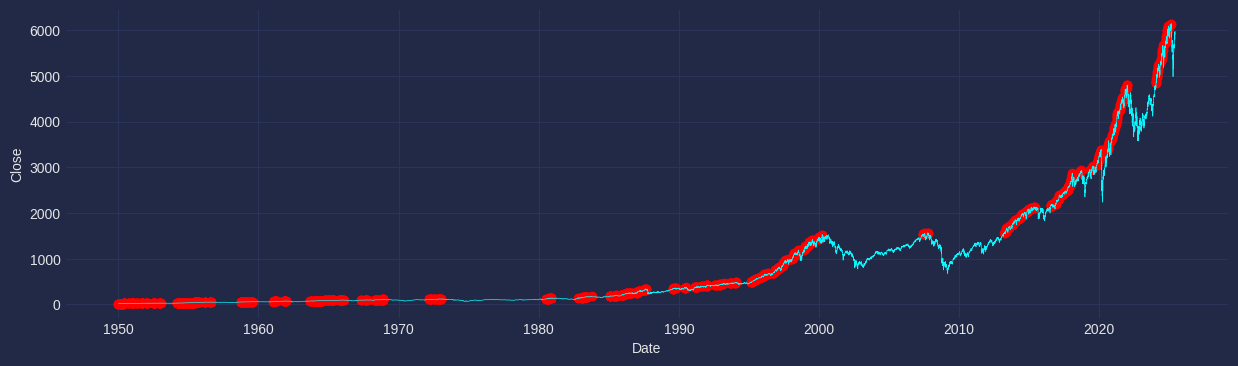

In [ ]:
ticker = yf.Ticker("^GSPC")
sp500_daily = ticker.history(start=date(year=1950, month=1, day=1), end=date.today(), interval = "1d")
all_time_highs = sp500_daily[sp500_daily.Close == sp500_daily.Close.cummax()]
plt.figure(figsize=(15, 4))
sns.lineplot(data=sp500_daily, x=sp500_daily.index, y=sp500_daily["Close"], linewidth=0.5)
plt.scatter(x=all_time_highs.index, y=all_time_highs["Close"], color="red");

In [ ]:
durations = []
for start_ath, end_ath in zip(all_time_highs.index[:-1], all_time_highs.index[1:]):
    min_price = sp500_daily.loc[start_ath:end_ath].Close.min()
    min_date = sp500_daily.loc[start_ath:end_ath].Close.idxmin()
    max_price = sp500_daily.loc[start_ath].Close
    drawdown = (max_price - min_price) / max_price * 100
    if drawdown > 5:
        durations.append({"start_ath":start_ath, "min_date": min_date, "drawdown": drawdown, "duration": (min_date - start_ath).days})

durations = pd.DataFrame(durations)
percentiles = durations.duration.quantile([0.25, 0.5, 0.75])
print("Correction duration percentiles (in days):")
print(percentiles)

Correction duration percentiles (in days):
0.25    21.5
0.50    39.0
0.75    89.0
Name: duration, dtype: float64


In [ ]:
for i, row in durations.sort_values(by="drawdown", ascending=False)[:10].iterrows():
    start_ath = row["start_ath"]
    min_date = row["min_date"]
    drawdown = row["drawdown"]
    duration = row["duration"]
    print(f"{start_ath.date()} to {min_date.date()}: {drawdown:.1f}% drawdown over {duration} days")

2007-10-09 to 2009-03-09: 56.8% drawdown over 517 days
2000-03-24 to 2002-10-09: 49.1% drawdown over 928 days
1973-01-11 to 1974-10-03: 48.2% drawdown over 629 days
1968-11-29 to 1970-05-26: 36.1% drawdown over 542 days
2020-02-19 to 2020-03-23: 33.9% drawdown over 32 days
1987-08-25 to 1987-12-04: 33.5% drawdown over 101 days
1961-12-12 to 1962-06-26: 28.0% drawdown over 195 days
1980-11-28 to 1982-08-12: 27.1% drawdown over 621 days
2022-01-03 to 2022-10-12: 25.4% drawdown over 281 days
1966-02-09 to 1966-10-07: 22.2% drawdown over 239 days


---
### Question 4.  [Stocks] Earnings Surprise Analysis for Amazon (AMZN)


**Calculate the median 2-day percentage change in stock prices following positive earnings surprises days.**

Steps:


1. Load earnings data from CSV ([ha1_Amazon.csv](ha1_Amazon.csv)) containing earnings dates, EPS estimates, and actual EPS. Make sure you are using the correct delimiter to read the data, such as in this command ```python pandas.read_csv("ha1_Amazon.csv", delimiter=';') ```

In [ ]:
!wget https://colab.research.google.com/drive/ha1_Amazon.csv

--2025-06-04 19:13:41--  https://colab.research.google.com/drive/ha1_Amazon.csv
Resolving colab.research.google.com (colab.research.google.com)... 216.239.36.180, 216.239.38.180, 216.239.32.180, ...
Connecting to colab.research.google.com (colab.research.google.com)|216.239.36.180|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘ha1_Amazon.csv’

ha1_Amazon.csv          [ <=>                ]  91.92K  --.-KB/s    in 0.006s  

2025-06-04 19:13:41 (15.6 MB/s) - ‘ha1_Amazon.csv’ saved [94125]



In [ ]:
url = "https://raw.githubusercontent.com/DataTalksClub/stock-markets-analytics-zoomcamp/refs/heads/main/cohorts/2025/ha1_Amazon.csv"
earnings_df = pd.read_csv(url, delimiter=';')
earnings_df["Earnings Date"] = pd.to_datetime(earnings_df["Earnings Date"].str.replace(r'\s+[A-Z]{2,4}$', '', regex=True), format='mixed', errors='coerce')
earnings_df["Earnings Date"] = earnings_df["Earnings Date"].dt.tz_localize(None)
earnings_df.head()

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%)
0,AMZN,Amazon.com Inc,2026-04-29 06:00:00,-,-,-
1,AMZN,Amazon.com Inc,2026-02-04 16:00:00,-,-,-
2,AMZN,Amazon.com Inc,2025-10-29 06:00:00,-,-,-
3,AMZN,Amazon.com Inc,2025-07-30 16:00:00,-,-,-
4,AMZN,"Amazon.com, Inc.",2025-05-01 16:00:00,???.36,???.59,+16.74


#### Cleaning features

In [ ]:
earnings_df["EPS Estimate"].unique()

array(['-', '???.36', '???.49', '???.14', '01.???', '0.83', '0.8', '0.58',
       '0.35', '0.21', '0.18', '0.22', '0.14', '0.42', '0.45', '0.62',
       '0.48', '0.36', '0.37', '0.07', '0.31', '0.2', '0.23', '0.28',
       '0.24', '0.16', '0.13', '0.06', '0.09', '0.05', '0.04', '0.03',
       '0.08', '-0.01', '0.01', '-0.04', '0.02', '-0.02', nan],
      dtype=object)

In [ ]:
mask = earnings_df["EPS Estimate"].str.contains(r'^\s*-?\d+(\.\d+)?\s*$', regex=True, na=False)
earnings_df_clean = earnings_df[mask].copy()
earnings_df_clean["EPS Estimate"] = earnings_df_clean["EPS Estimate"].astype(float)
earnings_df_clean["EPS Estimate"].unique()

<ipython-input-278-167ad9e6b9e0>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = earnings_df["EPS Estimate"].str.contains(r'^\s*-?\d+(\.\d+)?\s*$', regex=True, na=False)


array([ 0.83,  0.8 ,  0.58,  0.35,  0.21,  0.18,  0.22,  0.14,  0.42,
        0.45,  0.62,  0.48,  0.36,  0.37,  0.07,  0.31,  0.2 ,  0.23,
        0.28,  0.24,  0.16,  0.13,  0.06,  0.09,  0.05,  0.04,  0.03,
        0.08, -0.01,  0.01, -0.04,  0.02, -0.02])

In [ ]:
earnings_df_clean["Reported EPS"].unique()

array(['0.98', '1', '0.94', '0.65', '0.31', '0.25', '0.17', '0.18',
       '0.37', '0.29', '0.76', '0.79', '0.7', '0.62', '0.52', '0.32',
       '0.21', '0.26', '0.35', '0.3', '0.16', '0.11', '0.02', '0.07',
       '0.08', '0.03', '0.09', '0.05', '0.01', '-0.01', '-0.05', '0.04',
       '-0.02', '-0.03'], dtype=object)

In [ ]:
mask = earnings_df_clean["Reported EPS"].str.contains(r'^\s*-?\d+(\.\d+)?\s*$', regex=True, na=False)
earnings_df_clean = earnings_df_clean[mask].copy()
earnings_df_clean["Reported EPS"] = earnings_df_clean["Reported EPS"].astype(float)
earnings_df_clean["Reported EPS"].unique()

<ipython-input-280-db13df464d9f>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = earnings_df_clean["Reported EPS"].str.contains(r'^\s*-?\d+(\.\d+)?\s*$', regex=True, na=False)


array([ 0.98,  1.  ,  0.94,  0.65,  0.31,  0.25,  0.17,  0.18,  0.37,
        0.29,  0.76,  0.79,  0.7 ,  0.62,  0.52,  0.32,  0.21,  0.26,
        0.35,  0.3 ,  0.16,  0.11,  0.02,  0.07,  0.08,  0.03,  0.09,
        0.05,  0.01, -0.01, -0.05,  0.04, -0.02, -0.03])

In [ ]:
earnings_df_clean.head()

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%)
8,AMZN,"Amazon.com, Inc.",2024-04-30 16:00:00,0.83,0.98,+17.91
9,AMZN,"Amazon.com, Inc.",2024-02-01 16:00:00,0.80,1.00,+24.55
10,AMZN,"Amazon.com, Inc.",2023-10-26 16:00:00,0.58,0.94,+60.85
11,AMZN,"Amazon.com, Inc.",2023-08-03 16:00:00,0.35,0.65,+85.73
12,AMZN,"Amazon.com, Inc.",2023-04-27 16:00:00,0.21,0.31,+46.36


2. Download complete historical price data using yfinance

In [ ]:
ticker = yf.Ticker("AMZN")
amzn_daily = ticker.history(period="max", interval = "1d")
amzn_daily = amzn_daily.dropna()

amzn_daily.index = amzn_daily.index.tz_localize(None)
amzn_daily = amzn_daily.sort_index()

amzn_daily.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0
1997-05-16,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0
1997-05-19,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0
1997-05-20,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0
1997-05-21,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0


3. Calculate 2-day percentage changes for all historical dates: for each sequence of 3 consecutive trading days (Day 1, Day 2, Day 3), compute the *return* as Close_Day3 / Close_Day1 - 1. (Assume Day 2 may correspond to the earnings announcement.)

In [ ]:
returns_2day_ahd = []
dates = amzn_daily.index

for d1, d3 in zip(dates[:-2], dates[2:]):
    returns_2day_ahd.append((amzn_daily.loc[d3].Close / amzn_daily.loc[d1].Close) - 1)

4. Identify positive earnings surprises (where "actual EPS > estimated EPS"). Both fields should be present in the file. You should obtain 36 data points for use in the descriptive analysis (median) later.

In [ ]:
positive_surprises_clean = earnings_df[earnings_df["Reported EPS"] > earnings_df["EPS Estimate"]].sort_values(by="Earnings Date")

mask = earnings_df["Surprise (%)"].str.contains(r'^\s*[+-]?\d+(\.\d+)?\s*$', regex=True, na=False)
earnings_df_sur_clean = earnings_df[mask].copy()
earnings_df_sur_clean["Surprise (%)"] = earnings_df_sur_clean["Surprise (%)"].astype("float")

sur_clean = earnings_df_sur_clean[earnings_df_sur_clean["Surprise (%)"] > 0]
sur_clean = earnings_df.iloc[sur_clean.index]
positive_surprises = pd.concat([positive_surprises_clean, sur_clean]).sort_values(by="Earnings Date")
positive_surprises = positive_surprises.drop_duplicates()

len(positive_surprises)

<ipython-input-296-2a08a8a5866a>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = earnings_df["Surprise (%)"].str.contains(r'^\s*[+-]?\d+(\.\d+)?\s*$', regex=True, na=False)


89

In [ ]:
positive_surprises.head()

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%)
115,AMZN,"Amazon.com, Inc.",1997-07-10,-,-,+13.33
114,AMZN,"Amazon.com, Inc.",1997-10-27,-,-,+13.29
113,AMZN,"Amazon.com, Inc.",1998-01-22,-,-,+11.41
112,AMZN,"Amazon.com, Inc.",1998-04-27,-,-,+13.92
111,AMZN,"Amazon.com, Inc.",1998-07-22,-,-,+1.34


5. Calculate 2-day percentage changes following positive earnings surprises. Show your answer in % (closest number to the 2nd digit): *return* * 100.0

In [ ]:
returns_2day_ps = []

for date in positive_surprises['Earnings Date']:
    future_dates = amzn_daily.index[amzn_daily.index >= date]
    if len(future_dates) < 3:
        continue
    d1 = future_dates[0]
    d3 = future_dates[2]
    ret = (amzn_daily.loc[d3].Close / amzn_daily.loc[d1].Close) - 1
    returns_2day_ps.append(ret)

6. (Optional) Compare the median 2-day percentage change for positive surprises vs. all historical dates. Do you see the difference?

In [ ]:
np.median(returns_2day_ps) * 100, np.median(returns_2day_ahd) * 100

(np.float64(0.28388467842930254), np.float64(0.16581674487468057))

Context: Earnings announcements, especially when they exceed analyst expectations, can significantly impact stock prices in the short term.

Reference: Yahoo Finance earnings calendar - https://finance.yahoo.com/calendar/earnings?symbol=AMZN

*Additional*: Is there a correlation between the magnitude of the earnings surprise and the stock price reaction? Does the market react differently to earnings surprises during bull vs. bear markets?)


---
### Question 5.  [Exploratory, optional] Brainstorm potential idea for your capstone project

**Free text answer**

Describe the capstone project you would like to pursue, considering your aspirations, ML model predictions, and prior knowledge. Even if you are unsure at this stage, try to generate an idea you would like to explore-such as a specific asset class, country, industry vertical, or investment strategy. Be as specific as possible.

*Example: I want to build a short-term prediction model for the US/India/Brazil stock markets, focusing on the largest stocks over a 30-day investment horizon. I plan to use RSI and MACD technical indicators and news coverage data to generate predictions.*

I want to build a short-term forecasting model for monthly inflation in Argentina, using a combination of macroeconomic, monetary, and real-time market indicators. I plan to focus on a 1-month prediction horizon. Input variables will include monetary aggregates (M2), official and parallel USD/ARS exchange rates, central bank interest rates, commodity prices (soy, oil, wheat), and global inflation trends. The goal is to capture the key drivers of inflation volatility in Argentina and provide early warning signals. I will use tree-based models (e.g., XGBoost) and recurrent neural networks (LSTM) to evaluate performance.

---
### Question 6. [Exploratory, optional] Investigate new metrics

**Free text answer**

Using the data sources we have covered (or any others you find relevant), download and explore a few additional metrics or time series that could be valuable for your project. Briefly explain why you think each metric is useful. This does not need to be a comprehensive list-focus on demonstrating your ability to generate data requests based on your project description, identify and locate the necessary data, and explain how you would retrieve it using Python.

### Volatility Index (VIX)
#### Why it's useful?

The VIX measures expected market volatility over the next 30 days and often spikes during market stress. It’s a leading indicator of investor sentiment and risk.

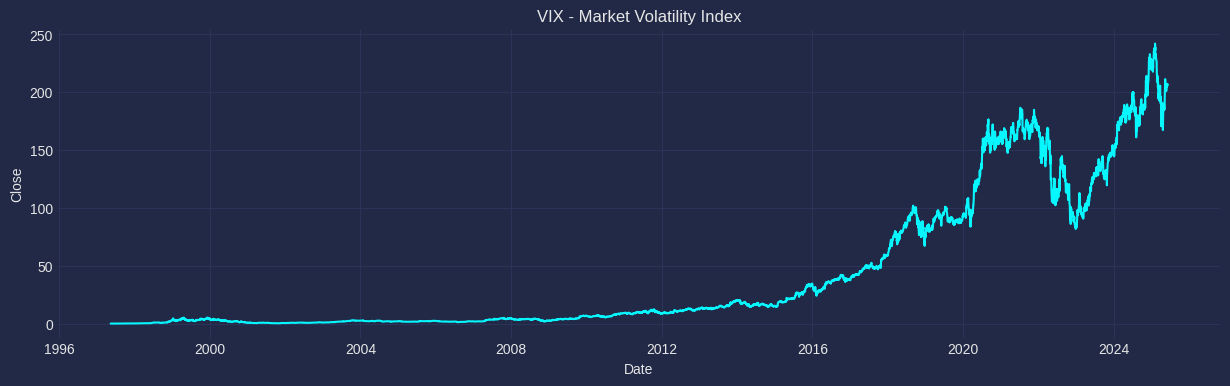

In [ ]:
import yfinance as yf

ticker = yf.Ticker("AMZN")
vix = ticker.history(period="max", interval = "1d")
plt.figure(figsize=(15, 4))
sns.lineplot(x=vix.index, y=vix.Close)
plt.title("VIX - Market Volatility Index");